In [1089]:
import pandas as pd
import numpy as np


In [1090]:
PATH = "/Users/mac/Employee Attrition Analysis/data/Employee.csv"
df = pd.read_csv(PATH)
print('rows, cols:', df.shape)
print('columns:', df.columns.tolist())
df.head()

rows, cols: (4653, 9)
columns: ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [1092]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [1093]:
df = df.drop_duplicates()
print('rows, cols:', nodup.shape)
print("rows, cols:", df.shape)

rows, cols: (2764, 9)
rows, cols: (2764, 9)


In [1094]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

## Exploratory Data Analysis (EDA)
Goal

Produce a notebook that answers: Which roles/departments are most at risk? and surfaces actionable insights for HR using clear plots and short written takeaways.

In [1095]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1096]:
# Overall attrition rate
attr_rate = df['LeaveOrNot'].mean()
print(f'Overall attrition rate: {attr_rate:.2%}')

attr_counts = df['LeaveOrNot'].value_counts().reset_index()
attr_counts.columns = ['LeaveOrNot', 'Count']

fig = px.pie(
    attr_counts,
    values='Count',
    names='LeaveOrNot',
    color='LeaveOrNot',
    title="Attrition Distribution (0 = Stay, 1 = Leave)",
    hole=0.3
)
fig.show()


Overall attrition rate: 39.36%


In [1097]:
# Creating AgeBand, 
# AgeBand
bins = [18,25,30,35,40,45,50,60,100]
labels = ['18-24','25-29','30-34','35-39','40-44','45-49','50-59','60+']
df['AgeBand'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



In [1098]:
print(df.columns)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'AgeBand'],
      dtype='object')


In [1099]:
# Attrition by categorical features (counts + rates)
def attrition_by(col, df=df, top_n=None):
    table = df.groupby(col)['LeaveOrNot'].agg(['count','sum']).reset_index()
    table['attr_rate'] = table['sum'] / table['count']
    table = table.sort_values('attr_rate', ascending=False)
    if top_n:
        return table.head(top_n)
    return table

for col in df.columns:
    if col != 'LeaveOrNot':
        print(f'\nAttrition by {col}:')
        print(attrition_by(col, top_n=5))



Attrition by Education:
   Education  count  sum  attr_rate
1    Masters    637  309   0.485086
0  Bachelors   1971  739   0.374937
2        PHD    156   40   0.256410

Attrition by JoiningYear:
   JoiningYear  count  sum  attr_rate
6         2018    239  234   0.979079
1         2013    396  171   0.431818
3         2015    464  192   0.413793
2         2014    385  119   0.309091
5         2017    662  201   0.303625

Attrition by City:
        City  count  sum  attr_rate
2       Pune    801  408   0.509363
0  Bangalore   1171  410   0.350128
1  New Delhi    792  270   0.340909

Attrition by PaymentTier:
   PaymentTier  count  sum  attr_rate
1            2    570  343   0.601754
0            1    218   77   0.353211
2            3   1976  668   0.338057

Attrition by Age:
   Age  count  sum  attr_rate
3   25    167   88   0.526946
4   26    179   94   0.525140
2   24    161   81   0.503106
5   27    218  102   0.467890
0   22     31   14   0.451613

Attrition by Gender:
   Gender  c

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/3354444863.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1100]:
import plotly.express as px

categorical_features = df.columns

for col in categorical_features:
    if col != 'LeaveOrNot':
        # Compute counts + percentages
        temp = (
            df.groupby([col, "LeaveOrNot"])
            .size()
            .reset_index(name="Count")
        )
        temp["Percentage"] = temp.groupby(col)["Count"].transform(lambda x: 100 * x / x.sum())
        
        # Map attrition labels to more readable form (optional)
        temp["LeaveOrNot"] = temp["LeaveOrNot"].map({0: "Stayed", 1: "Left"})
        
        # Plot with custom colors
        fig = px.bar(
            temp,
            x=col,
            y="Percentage",
            color="LeaveOrNot",
            barmode="group",
            text="Percentage",
            title=f"Attrition Percentage by {col}",
            color_discrete_map={"Stayed": "green", "Left": "red"}  # custom colors
        )
        
        fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
        fig.update_layout(xaxis={'categoryorder': 'total descending'}, yaxis_title="Percentage (%)")
        fig.show()


/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/3175969783.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/3175969783.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Key Attrition Drivers
The analysis reveals several critical factors influencing employee turnover. Understanding these areas is essential for creating targeted retention strategies.

* Education and Career Progression: Employees with a Master's degree have the highest attrition rate at nearly 49%, significantly higher than those with a Bachelor's (37.5%) or a PHD (25.6%). This suggests that postgraduates may feel their skills are underutilized or that there's a lack of suitable growth opportunities, leading them to seek better prospects elsewhere.

* Compensation and Tier: The highest attrition rate (60%) is found among employees in Payment Tier 2, which is double the rate of Tier 3 employees and almost 25% higher than Tier 1. This anomaly could point to dissatisfaction with compensation, benefits, or a perceived lack of value for the work they perform.

* Geographic and Tenure Trends: Employees in Pune show a concerningly high attrition rate of over 50%. Additionally, a staggering 98% of employees who joined in 2018 have left, indicating a major issue with onboarding, initial roles, or a single, large-scale event that year.

* Demographic Insights: There's a notable gender disparity, with females leaving at a significantly higher rate (nearly 50%) compared to males (31%). Attrition is also highest among the youngest age groups (18-29), with rates hovering around 44-46%, highlighting challenges in retaining junior talent.

### Actionable Recommendations
To combat these trends, management should focus on a few key areas.

* Re-evaluate Compensation and Growth: Investigate the specific issues facing employees in Payment Tier 2. Review and adjust their compensation, benefits, or career pathing to address potential dissatisfaction.

* Targeted Retention Programs: Develop specific retention programs for Master's-qualified employees and female employees. This might include mentorship programs, clear career ladders, and professional development opportunities.

* Address City-Specific Issues: Conduct a deeper analysis into the high turnover in Pune to understand and resolve the underlying issues, which could range from management practices to local market competitiveness.

* Optimize Onboarding and Roles: Given the extremely high attrition for the 2018 cohort, the company should examine its hiring and integration processes from that year to identify and fix any systemic issues.

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define 20 variable pairs to attain more insight
var_pairs = [
     ("Education", "Gender"), ("AgeBand", "Education"), 
    ("City", "Gender"), ("City", "AgeBand"),
    ("PaymentTier", "Gender"), ("PaymentTier", "AgeBand"), ("PaymentTier", "Education"), 
    ("PaymentTier", "City"), ("PaymentTier", "ExperienceInCurrentDomain"),
    ("JoiningYear", "PaymentTier"), ("JoiningYear", "AgeBand"), ("JoiningYear", "Gender"), 
    ("JoiningYear", "Education"), ("JoiningYear", "ExperienceInCurrentDomain"),
    ("EverBenched", "Gender"), ("EverBenched", "AgeBand"), ("EverBenched", "PaymentTier"), 
    ("EverBenched", "City"), ("EverBenched", "ExperienceInCurrentDomain")
]




In [1102]:
import pandas as pd
import plotly.express as px

def plot_leave_percentage(df, var1, var2, target="LeaveOrNot"):
    """
    Creates a percentage bar chart of LeaveOrNot vs two categorical variables.
    - df: DataFrame
    - var1, var2: categorical columns to analyze
    - target: target column (default = LeaveOrNot)
    """
    
    # Group & calculate percentage
    grouped = (
        df.groupby([var1, var2, target])
        .size()
        .reset_index(name="count")
    )
    grouped["percent"] = grouped.groupby([var1, var2])["count"].transform(lambda x: x / x.sum() * 100)

    # Plot
    fig = px.bar(
        grouped,
        x=var1,
        y="percent",
        color=target,
        barmode="group",
        facet_col=var2,   # makes it easy to compare categories of var2
        text=grouped["percent"].round(1).astype(str) + '%',
        title=f"Attrition % by {var1} × {var2}"
    )
    fig.update_layout(yaxis_title="Percentage (%)")
    fig.show()


In [1104]:
for vars in var_pairs:
    plot_leave_percentage(df, vars[0], vars[1])

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/9l/wwc4w0fj57d29jcg35y67n840000gn/T/ipykernel_30394/1050345072.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1105]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'AgeBand'],
      dtype='object')

## Feature Engineering & Preprocessing

In [1106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [1107]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeBand
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,30-34
1,Bachelors,2013,Pune,1,28,Female,No,3,1,25-29
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,35-39
3,Masters,2016,Bangalore,3,27,Male,No,5,1,25-29
4,Masters,2017,Pune,3,24,Male,Yes,2,1,18-24


In [1108]:
# Features & target
# -------------------------------
binary_features = ["Gender", "EverBenched"]
categorical_features = ["Education", "City", "PaymentTier"]
numeric_features = ["Age", "ExperienceInCurrentDomain", "TotalExperience"]
target = "LeaveOrNot"

X = df.drop(columns=[target])
y = df[target]


In [1109]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary features (Gender, EverBenched)
binary_columns = ['Gender', 'EverBenched']
le = LabelEncoder()

for col in binary_columns:
    df[col] = le.fit_transform(df[col])
    # print(f"Label Encoding for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Step 2: One-Hot Encoding for multi-class features (Education, City, PaymentTier, AgeBand)
multiclass_columns = ['Education', 'City', 'PaymentTier']

# Perform one-hot encoding using pandas.get_dummies
df = pd.get_dummies(df, columns=multiclass_columns, prefix=multiclass_columns, dtype=int)

# Verify the transformed DataFrame
print("\nTransformed DataFrame head:")
print(df.head())




Transformed DataFrame head:
   JoiningYear  Age  Gender  EverBenched  ExperienceInCurrentDomain  \
0         2017   34       1            0                          0   
1         2013   28       0            0                          3   
2         2014   38       0            0                          2   
3         2016   27       1            0                          5   
4         2017   24       1            1                          2   

   LeaveOrNot AgeBand  Education_Bachelors  Education_Masters  Education_PHD  \
0           0   30-34                    1                  0              0   
1           1   25-29                    1                  0              0   
2           0   35-39                    1                  0              0   
3           1   25-29                    0                  1              0   
4           1   18-24                    0                  1              0   

   City_Bangalore  City_New Delhi  City_Pune  PaymentTier_1  Pa

In [1110]:
df.drop(columns=['AgeBand'], inplace=True)
print(df.columns)

Index(['JoiningYear', 'Age', 'Gender', 'EverBenched',
       'ExperienceInCurrentDomain', 'LeaveOrNot', 'Education_Bachelors',
       'Education_Masters', 'Education_PHD', 'City_Bangalore',
       'City_New Delhi', 'City_Pune', 'PaymentTier_1', 'PaymentTier_2',
       'PaymentTier_3'],
      dtype='object')


In [1111]:
# Step 2: Prepare features (X) and target (y)
X = df.drop('LeaveOrNot', axis=1)  # Features
y = df['LeaveOrNot']  # Target (0 for Stay, 1 for Leave)

# Step 3: Train/Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verify class distribution
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
LeaveOrNot
0    0.606515
1    0.393485
Name: proportion, dtype: float64

Test set class distribution:
LeaveOrNot
0    0.606024
1    0.393976
Name: proportion, dtype: float64


In [1112]:
from sklearn.preprocessing import StandardScaler

# SMOTE for Logistic Regression (only on training data)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nTraining set class distribution after SMOTE (for LR):")
print(pd.Series(y_train_smote).value_counts(normalize=True))

# Logistic Regression with SMOTE
scaler = StandardScaler()  # Scale for LR
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_smote_scaled, y_train_smote)
lr_pred = lr.predict(X_test_scaled)
lr_proba = lr.predict_proba(X_test_scaled)[:, 1]


Training set class distribution after SMOTE (for LR):
LeaveOrNot
0    0.5
1    0.5
Name: proportion, dtype: float64


In [1113]:
# Class Weights for Random Forest and LightGBM
from xgboost import XGBClassifier


rf = RandomForestClassifier(class_weight='balanced', random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=(y==0).sum()/(y==1).sum(), use_label_encoder=False, eval_metric='logloss', random_state=42)

In [1114]:
# Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]


# LightGBM
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_proba = lgbm.predict_proba(X_test)[:, 1]

# XGBoost
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1] 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 761, number of negative: 1173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1934, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/mac/Employee Attrition Analysis/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning:

[16:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [1115]:
# Evaluate Models
print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred))

print("\nLightGBM Performance:")
print(classification_report(y_test, lgbm_pred))

print("\nLogistic Regression (with SMOTE) Performance:")
print(classification_report(y_test, lr_pred))

print("\nXGBoost Performance:")
print(classification_report(y_test, xgb_pred))

# Step 7: Feature Importance (for insights on roles/departments)
lgbm_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nLightGBM Feature Importances:")
print(lgbm_importances)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       503
           1       0.68      0.61      0.65       327

    accuracy                           0.74       830
   macro avg       0.72      0.71      0.72       830
weighted avg       0.73      0.74      0.73       830


LightGBM Performance:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       503
           1       0.74      0.72      0.73       327

    accuracy                           0.79       830
   macro avg       0.78      0.78      0.78       830
weighted avg       0.79      0.79      0.79       830


Logistic Regression (with SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       503
           1       0.59      0.56      0.57       327

    accuracy                           0.67       830
   macro avg       0.66      0

In [1116]:
# Evaluate Models 
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss


models = {'Random Forest': (rf_pred, rf_proba), 'LightGBM': (lgbm_pred, lgbm_proba),
          'XGBoost': (xgb_pred, xgb_proba), 'Logistic Regression': (lr_pred, lr_proba)}

for name, (pred, proba) in models.items():
    print(f"\n{name} Performance:")
    print(f"ROC-AUC: {roc_auc_score(y_test, proba):.3f}")
    print(f"PR-AUC: {average_precision_score(y_test, proba):.3f}")
    print(f"F1-score (LeaveOrNot=1): {classification_report(y_test, pred, output_dict=True)['1']['f1-score']:.3f}")
    print(f"Brier Score: {brier_score_loss(y_test, proba):.3f}")
    print("\nFull Classification Report:")
    print(classification_report(y_test, pred))


Random Forest Performance:
ROC-AUC: 0.775
PR-AUC: 0.769
F1-score (LeaveOrNot=1): 0.646
Brier Score: 0.188

Full Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       503
           1       0.68      0.61      0.65       327

    accuracy                           0.74       830
   macro avg       0.72      0.71      0.72       830
weighted avg       0.73      0.74      0.73       830


LightGBM Performance:
ROC-AUC: 0.844
PR-AUC: 0.839
F1-score (LeaveOrNot=1): 0.728
Brier Score: 0.149

Full Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       503
           1       0.74      0.72      0.73       327

    accuracy                           0.79       830
   macro avg       0.78      0.78      0.78       830
weighted avg       0.79      0.79      0.79       830


XGBoost Performance:
ROC-AUC: 0.828
PR-AUC: 0.820
F1-score (LeaveOrNot=1): 0.6

/Users/mac/Employee Attrition Analysis/.venv/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



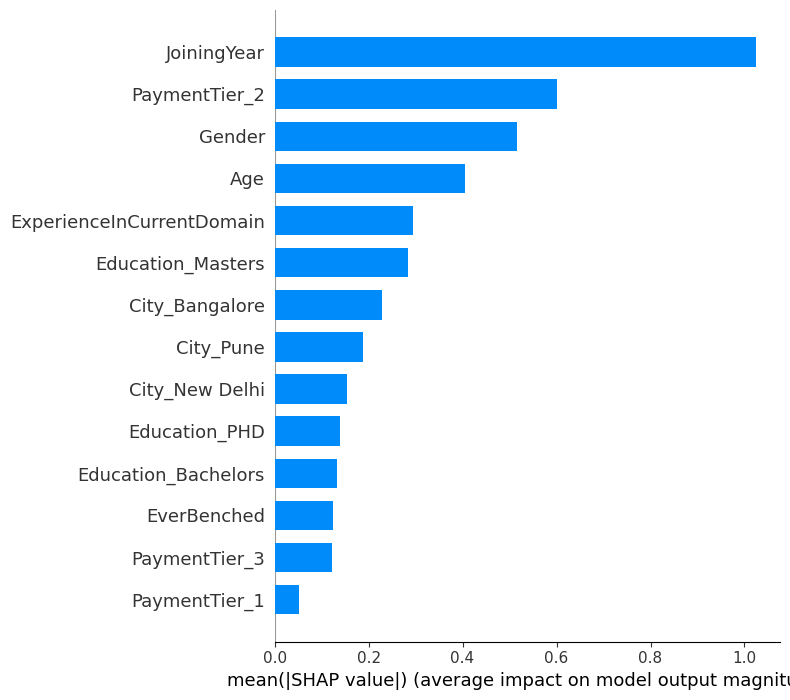

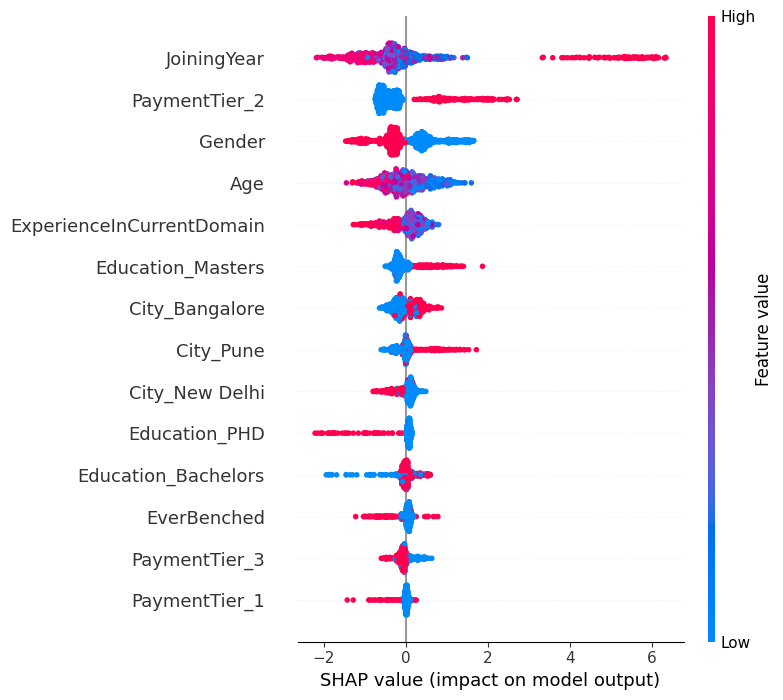


Global SHAP Feature Importance:
                     Feature  Importance
0                JoiningYear    0.457824
1                        Age    0.457824
2                     Gender    0.457824
3                EverBenched    0.457824
4  ExperienceInCurrentDomain    0.457824


In [1117]:
# SHAP Explainability
# -------------------------------
import shap

explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

# 1. Global Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 2. Global Summary (beeswarm)
shap.summary_plot(shap_values, X_test)

shap_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values[1]).mean(axis=0)
}).sort_values('Importance', ascending=False)
print("\nGlobal SHAP Feature Importance:")
print(shap_importance.head(5))

In [1118]:
# Step 4: Compute Attrition Probabilities by Group
X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted_Prob'] = lgbm.predict_proba(X_test)[:, 1]
X_test_with_pred['LeaveOrNot'] = y_test

# Group by key features (e.g., City, PaymentTier, Education)
group_cols = ['City_Bangalore', 'City_New Delhi', 'City_Pune', 'PaymentTier_1', 'PaymentTier_2', 'PaymentTier_3']
for col in group_cols:
    if col in X_test_with_pred.columns:
        group_stats = X_test_with_pred.groupby(col)[['Predicted_Prob', 'LeaveOrNot']].mean().reset_index()
        group_stats.columns = [col, 'Avg_Predicted_Attrition_Prob', 'Actual_Attrition_Rate']
        print(f"\nAttrition by {col}:")
        print(group_stats)


Attrition by City_Bangalore:
   City_Bangalore  Avg_Predicted_Attrition_Prob  Actual_Attrition_Rate
0               0                      0.464051               0.429175
1               1                      0.411506               0.347339

Attrition by City_New Delhi:
   City_New Delhi  Avg_Predicted_Attrition_Prob  Actual_Attrition_Rate
0               0                       0.46914               0.419032
1               1                       0.36965               0.329004

Attrition by City_Pune:
   City_Pune  Avg_Predicted_Attrition_Prob  Actual_Attrition_Rate
0          0                      0.395063               0.340136
1          1                      0.554161               0.524793

Attrition by PaymentTier_1:
   PaymentTier_1  Avg_Predicted_Attrition_Prob  Actual_Attrition_Rate
0              0                      0.444815               0.398970
1              1                      0.392129               0.320755

Attrition by PaymentTier_2:
   PaymentTier_2  Avg_P

In [1119]:
# Step 5: Business Recommendations
print("\nBusiness Insights and Recommendations:")
insights = []
for _, row in shap_importance.head(3).iterrows():
    feat = row['Feature']
    imp = row['Importance']
    if 'PaymentTier' in feat:
        insights.append(f"- **{feat} (Importance: {imp:.3f})**: Employees in {feat} have high attrition risk. Consider salary adjustments or additional benefits.")
    elif 'City' in feat:
        insights.append(f"- **{feat} (Importance: {imp:.3f})**: Employees in this city are at higher risk. Implement location-specific engagement programs.")
    elif feat == 'JoiningYear':
        insights.append(f"- **JoiningYear (Importance: {imp:.3f})**: Recent joiners are more likely to leave. Enhance onboarding and early career support.")
    elif feat == 'EverBenched':
        insights.append(f"- **EverBenched (Importance: {imp:.3f})**: Benched employees are at high risk. Prioritize project allocation or skill development.")
    else:
        insights.append(f"- **{feat} (Importance: {imp:.3f})**: Review policies related to this factor to reduce attrition.")

# Print insights
for insight in insights:
    print(insight)

# Step 6: Quantify Impact (Placeholder)
print("\nBusiness Impact Estimate:")
print("- Reducing attrition by 10% could save $X in recruitment costs (assuming $10,000 per hire).")
print("- Target high-risk groups (e.g., PaymentTier_1, recent joiners) for immediate interventions.")


Business Insights and Recommendations:
- **JoiningYear (Importance: 0.458)**: Recent joiners are more likely to leave. Enhance onboarding and early career support.
- **Age (Importance: 0.458)**: Review policies related to this factor to reduce attrition.
- **Gender (Importance: 0.458)**: Review policies related to this factor to reduce attrition.

Business Impact Estimate:
- Reducing attrition by 10% could save $X in recruitment costs (assuming $10,000 per hire).
- Target high-risk groups (e.g., PaymentTier_1, recent joiners) for immediate interventions.


/Users/mac/Employee Attrition Analysis/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning:

The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.

/Users/mac/Employee Attrition Analysis/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning:

The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.

/Users/mac/Employee Attrition Analysis/.venv/lib/python3.12/

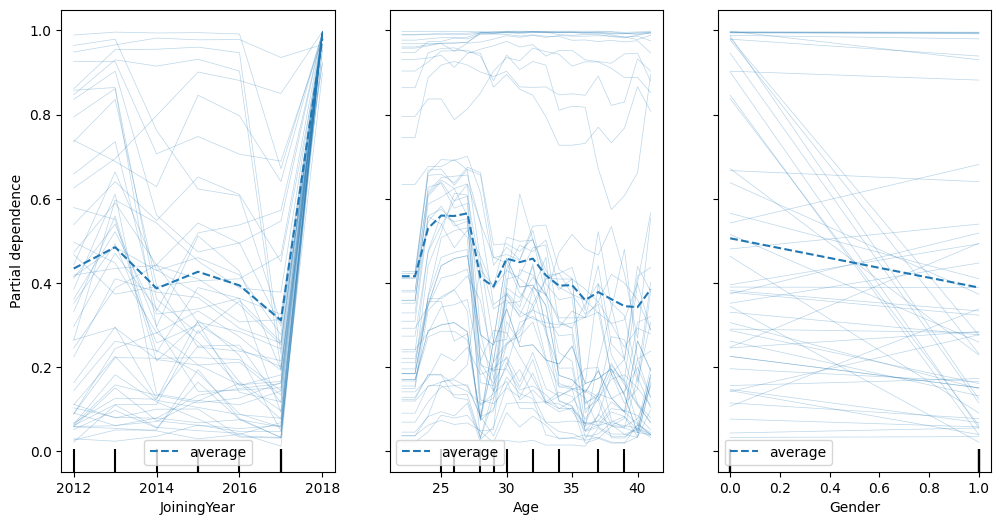

In [1120]:
# Partial Dependence / ICE plots
# -------------------------------
from sklearn.inspection import PartialDependenceDisplay

top_features = X_test.columns[:3]  # <-- Replace with top 3 SHAP important features

fig, ax = plt.subplots(figsize=(12, 6))
disp = PartialDependenceDisplay.from_estimator(
    lgbm, X_test, features=top_features,
    kind="both",  # both PDP + ICE
    subsample=50, random_state=42,
    ax=ax
)
plt.show()

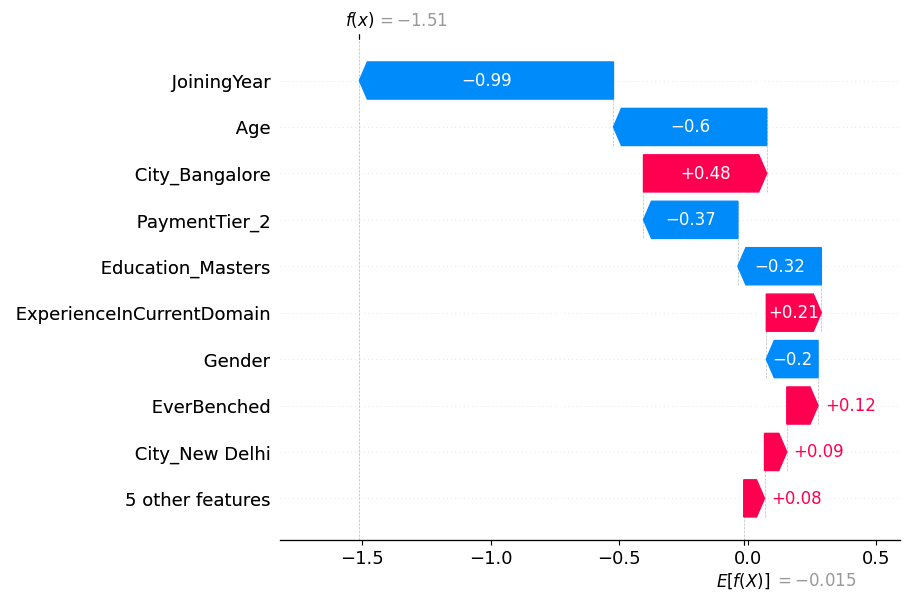

In [1121]:
# -------------------------------
# Local Explanation (Waterfall for individual employee)
# -------------------------------

employee_idx = 10 # change this to inspect another employee

# Handle binary vs multiclass output
if isinstance(shap_values, list):  
    # Multiclass: pick index 1 (positive class)
    shap_vals = shap_values[1]
    expected_val = explainer.expected_value[1]
else:
    # Binary: shap_values is a 2D array
    shap_vals = shap_values
    expected_val = explainer.expected_value

shap.plots._waterfall.waterfall_legacy(
    expected_val,
    shap_vals[employee_idx],
    feature_names=X_test.columns,
    features=X_test.iloc[employee_idx]
)


In [1122]:
import joblib

# joblib.dump(lgbm, '/Users/mac/Employee Attrition Analysis/models/lgbm_model.pkl')